<a href="https://colab.research.google.com/github/Aparna0112/Aparna0112/blob/main/mask_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT : MASK DETECTION**

**Goal** of the project is to detect whether a person is with mask or
without mask using Support Vector Classifier

**Import required libraries**

In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


**Store image **

In [4]:
data=[]
target=[]
Categories=['with_mask','without_mask']
datadir='/content/drive/MyDrive/Datasets/Maskdata'
for category in Categories:
  print("loading category........",category)
  path=os.path.join(datadir,category)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    imgpath=os.path.join(path,img)
    #print(imgpath)
    img_array=imread(imgpath)
    #print(img_array)
    img_resized=resize(img_array,(150,150,3))
    data.append(img_resized.flatten())
    target.append(Categories.index(category))
  print("Loaded category:",category)
print(target)




loading category........ with_mask
Loaded category: with_mask
loading category........ without_mask
Loaded category: without_mask
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Convert list to array**

In [5]:
X=np.array(data)
X

array([[0.96862745, 0.97254902, 0.98039216, ..., 0.96862745, 0.97254902,
        0.98039216],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.07450979, 0.07058823,
        0.09411764],
       [0.52156863, 0.62745098, 0.65490196, ..., 0.07133944, 0.08409199,
        0.10171471],
       ...,
       [0.31013333, 0.2395451 , 0.22385882, ..., 0.28454902, 0.22572549,
        0.20611765],
       [0.81147543, 0.81931857, 0.79971073, ..., 0.58358142, 0.24742449,
        0.2823526 ],
       [0.53004837, 0.52202222, 0.44003529, ..., 0.84786928, 0.57728105,
        0.41643137]])

In [6]:
y=np.array(target)
y

array([0, 0, 0, ..., 1, 1, 1])

**Split data into training and testing dataset**

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [8]:
X_train.shape,y_train.shape

((2205, 67500), (2205,))

**Model creation : SVC**

In [9]:
sv=SVC(random_state=1)
sv.fit(X_train,y_train)

SVC(random_state=1)

In [10]:
y_pred=sv.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

**Performance Evaluvation**

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       449
           1       0.91      0.90      0.90       496

    accuracy                           0.90       945
   macro avg       0.90      0.90      0.90       945
weighted avg       0.90      0.90      0.90       945



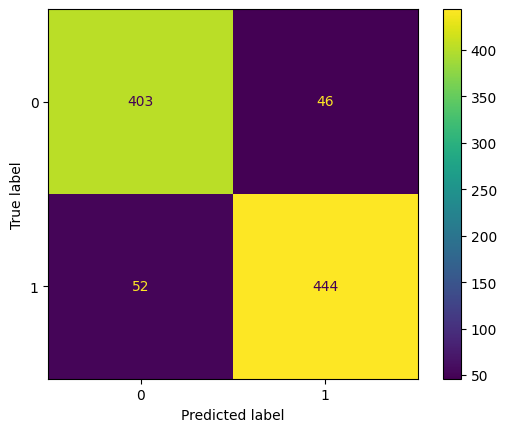

In [11]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**Read a new image**

array([[[164, 179, 199],
        [164, 179, 199],
        [164, 179, 199],
        ...,
        [191, 202, 218],
        [190, 200, 217],
        [190, 200, 217]],

       [[164, 179, 199],
        [164, 179, 199],
        [164, 179, 199],
        ...,
        [191, 202, 218],
        [190, 200, 217],
        [190, 200, 217]],

       [[164, 179, 199],
        [164, 179, 199],
        [164, 179, 199],
        ...,
        [191, 202, 218],
        [190, 200, 217],
        [190, 200, 217]],

       ...,

       [[  0,   0,   0],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
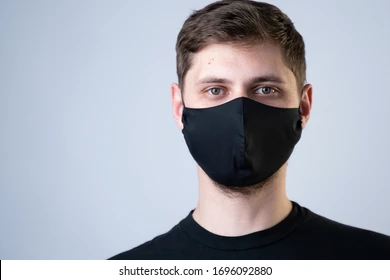

In [12]:
path1='/content/drive/MyDrive/Datasets/Maskdata/mask.jpg'
img=imread(path1)
img

**Resize image**

In [13]:
img1=resize(img,(150,150,3)).flatten()
img1.shape

(67500,)

In [14]:
img2=img1.reshape(1,-1)
img2.shape

(1, 67500)

In [15]:
X_train.shape

(2205, 67500)

**Prediction**

In [16]:
y_new=sv.predict(img2)
if y_new==0:
  print("with mask")
else:
  print("without mask")

with mask


In [4]:
!jupyter nbconvert --to html mask_classification.ipynb

[NbConvertApp] Converting notebook mask_classification.ipynb to html
[NbConvertApp] Writing 722548 bytes to mask_classification.html
